<a href="https://colab.research.google.com/github/vladlee098/kaggle/blob/master/cat_in_the_dat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle
!pip install kaggle-cli

     |████████████████████████████████| 81kB 5.6MB/s 
     |████████████████████████████████| 5.3MB 10.7MB/s 
     |████████████████████████████████| 112kB 35.2MB/s 
     |████████████████████████████████| 51kB 15.2MB/s 
     |████████████████████████████████| 112kB 43.6MB/s 
  Created wheel for kaggle-cli: filename=kaggle_cli-0.12.13-cp36-none-any.whl size=9488 sha256=44e38f19eefc97448b4fc7e3ce64f15ca4ca14f2a7ddf5acf4e0ac1d9291dfde
  Stored in directory: /root/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Created wheel for pyperclip: filename=pyperclip-1.7.0-cp36-none-any.whl size=8359 sha256=8a3b7a239330c8d7c9985e3c02f00f6394519e73404bf03f9587b7596a5072cc
  Stored in directory: /root/.cache/pip/wheels/92/f0/ac/2ba2972034e98971c3654ece337ac61e546bdeb34ca960dc8c
Successfully built kaggle-cli pyperclip
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: progressb

In [0]:
from google.colab import files
files.upload()

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
## Verify json content

!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

In [0]:
## List Kaggle DataSets
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                       2MB  2019-08-12 16:24:45          27237  
rajeevw/ufcdata                                           UFC-Fight historical data from 1993 to 2019          2MB  2019-07-05 09:58:02           1720  
lakshyaag/india-trade-data                                India - Trade Data                                   1MB  2019-08-16 16:13:58          12116  
gustavomodelli/forest-fires-in-brazil                     Forest Fires in Brazil                              31KB  2019-08-24 16:09:16           1848  
tristan581/17k-apple-app-store-strategy-games             17K Mobile Strategy Game

In [0]:
!ls

kaggle.json  sample_data


In [0]:
!kaggle competitions download -c cat-in-the-dat

 41% 5.00M/12.3M [00:00<00:00, 26.2MB/s]
100% 12.3M/12.3M [00:00<00:00, 48.8MB/s]
 61% 5.00M/8.15M [00:00<00:00, 23.7MB/s]
100% 8.15M/8.15M [00:00<00:00, 32.3MB/s]
  0% 0.00/437k [00:00<?, ?B/s]
100% 437k/437k [00:00<00:00, 132MB/s]


In [0]:
!ls

kaggle.json  sample_submission.csv.zip	train.csv.zip
sample_data  test.csv.zip


In [28]:
import zipfile

!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [30]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [0]:
from sklearn import preprocessing

def encode_df(df):
    df['bin_3_enc'] = preprocessing.LabelEncoder().fit_transform(df['bin_3'])
    df['bin_4_enc'] = preprocessing.LabelEncoder().fit_transform(df['bin_4'])
    df['nom_0_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_0'])
    df['nom_1_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_1'])
    df['nom_2_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_2'])
    df['nom_3_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_3'])
    df['nom_4_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_4'])
    df['nom_5_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_5'])
    df['nom_6_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_6'])
    df['nom_7_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_7'])
    df['nom_8_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_8'])
    df['nom_9_enc'] = preprocessing.LabelEncoder().fit_transform(df['nom_9'])
    df['ord_1_enc'] = preprocessing.LabelEncoder().fit_transform(df['ord_1'])
    df['ord_2_enc'] = preprocessing.LabelEncoder().fit_transform(df['ord_2'])
    df['ord_3_enc'] = preprocessing.LabelEncoder().fit_transform(df['ord_3'])
    df['ord_4_enc'] = preprocessing.LabelEncoder().fit_transform(df['ord_4'])
    df['ord_5_enc'] = preprocessing.LabelEncoder().fit_transform(df['ord_5'])
    
    df2 = df.drop(['bin_3','bin_4','nom_0','nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 
         'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5'], axis=1)
    return df2

In [32]:
df2 = encode_df(df)
df2.head()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target,bin_3_enc,bin_4_enc,nom_0_enc,nom_1_enc,nom_2_enc,nom_3_enc,nom_4_enc,nom_5_enc,nom_6_enc,nom_7_enc,nom_8_enc,nom_9_enc,ord_1_enc,ord_2_enc,ord_3_enc,ord_4_enc,ord_5_enc
0,0,0,0,0,2,2,2,0,1,1,1,5,5,3,0,78,120,491,1686,2175,2,1,7,3,136
1,1,0,1,0,1,7,8,0,1,1,1,4,3,5,2,159,510,260,650,11635,2,3,0,0,93
2,2,0,0,0,1,7,2,0,0,1,0,4,4,5,3,44,14,766,1932,8078,1,4,7,17,31
3,3,0,1,0,1,2,1,1,0,1,2,4,5,0,1,209,165,1121,629,6056,2,0,8,3,134
4,4,0,0,0,1,7,8,0,0,0,2,4,4,0,1,90,61,34,1760,8231,2,2,0,17,158


Text(0, 0.5, 'Frequency')

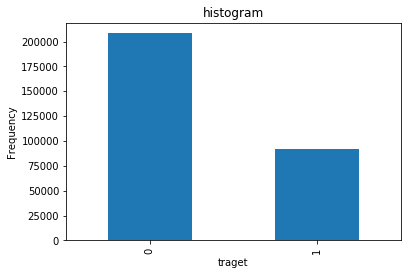

In [36]:
import matplotlib.pyplot as plt

count_classes = pd.value_counts(df2.target, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("histogram")
plt.xlabel("traget")
plt.ylabel("Frequency")

In [38]:
import numpy as np

true_txn_count = len(df2[df2.target == 1])
print('Number of traget rows is:' + str(true_txn_count))
true_txn_indices = np.array(df2[df2.target == 1].index)
false_txn_indices = df[df.target == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_txn_indices = np.random.choice(false_txn_indices, true_txn_count, replace = False)
random_txn_indices = np.array(random_txn_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([true_txn_indices,random_txn_indices])

# Under sample dataset
under_sample_data = df2.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'target']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'target']

# Showing ratio
print("Percentage of false txn: ", len(under_sample_data[under_sample_data.target == 0])/len(under_sample_data))
print("Percentage of true txn: ", len(under_sample_data[under_sample_data.target == 1])/len(under_sample_data))
print("Total number of txn in resampled data: ", len(under_sample_data))

Number of traget rows is:91764
Percentage of false txn:  0.5
Percentage of true txn:  0.5
Total number of txn in resampled data:  183528


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = under_sample_data['target'].copy()
X = under_sample_data.copy()
X.drop(['target','id'], inplace=True, axis=1)
columns = X.columns.copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Undersampled dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state = 42, shuffle=True)

print("")
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))


Number transactions train dataset:  137646
Number transactions test dataset:  45882
Total number of transactions:  183528


In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.regularizers import l2 # L2-regularisation
from keras.callbacks import EarlyStopping
from keras.constraints import unit_norm
print(keras.__version__)

Using TensorFlow backend.


2.2.5


In [42]:
!pip install talos

     |████████████████████████████████| 26.6MB 35.2MB/s 
     |████████████████████████████████| 839kB 37.9MB/s 
  Created wheel for talos: filename=talos-0.6.3-cp36-none-any.whl size=49626 sha256=07e751f26f51762200021634aa63d2dc85c8cf8ebdbca73f5d307aab2bbe8525
  Stored in directory: /root/.cache/pip/wheels/bb/d7/6b/86fd8b1fc7cfbd2c54796412f86efb5fb6a3a5c734014f6a66
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 sha256=ef841731c357d4df9143cf1253d3a601c17ea4bb0032141a5d0b171f6c47e6c9
  Stored in directory: /root/.cache/pip/wheels/bf/1b/50/d0403ce6ef269e364894da7b50db68db14c4ac62c577561e2d
  Created wheel for astetik: filename=astetik-1.9.9-cp36-none-any.whl size=56960 sha256=122e037172cc8baf7941dc26b470fd63a2d14042f0a7456ec1d545c1fdcb0e76
  Stored in directory: /root/.cache/pip/wheels/ae/70/21/c475cd079ec401dd6e1b9b1d42b4c38554ce12679bfb214aad
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 sha256=931b9202a8c9ac67e16d6e2

In [0]:
import talos as ta
from talos.model.normalizers import lr_normalizer

def create_model(X_train, y_train, X_val, y_val, params):
    model = Sequential()
    model.add(Dense(params['first_neuron'], 
                    input_dim=X_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer='normal'))

    #model.add(Dropout(params['dropout']))
    
    model.add(Dense(params['first_neuron'], 
                    activation=params['activation'],
                    kernel_initializer='normal'))

    #model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer='normal'))
    
    model.compile(optimizer=params['optimizer'],
                  loss=params['loss'],
                  metrics=['acc']) 
    
    history = model.fit(X_train, y_train, 
                        validation_data=[X_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
    
    # finally we have to make sure that history object and model are returned
    return history, model

In [65]:
# then we can go ahead and set the parameter space
p = {'lr': [0.005, 0.05],
     'first_neuron':[8, 16],
     'batch_size': [32, 64],
     'epochs': [40],
#     'dropout': [0, 0.1],
     'optimizer': ['adam', 'nadam'],
     'loss': ['binary_crossentropy'],
     'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']}
p

{'activation': ['relu', 'elu'],
 'batch_size': [32, 64],
 'epochs': [40],
 'first_neuron': [8, 16],
 'last_activation': ['sigmoid'],
 'loss': ['binary_crossentropy'],
 'lr': [0.005, 0.05],
 'optimizer': ['adam', 'nadam']}

In [66]:

# and run the experiment
t = ta.Scan(X_train,
            y_train.values,
            model=create_model,
            params=p,
            experiment_name = 'cat-in-the-dat')




  0%|          | 0/32 [00:00<?, ?it/s]


  3%|▎         | 1/32 [02:52<1:29:08, 172.53s/it]


  6%|▋         | 2/32 [05:44<1:26:08, 172.30s/it]


  9%|▉         | 3/32 [08:31<1:22:29, 170.68s/it]


 12%|█▎        | 4/32 [11:24<1:20:04, 171.57s/it]


 16%|█▌        | 5/32 [14:14<1:16:55, 170.94s/it]


 19%|█▉        | 6/32 [17:05<1:14:09, 171.13s/it]


 22%|██▏       | 7/32 [19:55<1:11:05, 170.61s/it]


 25%|██▌       | 8/32 [22:47<1:08:26, 171.09s/it]


 28%|██▊       | 9/32 [24:13<55:48, 145.58s/it]  


 31%|███▏      | 10/32 [25:41<47:01, 128.26s/it]


 34%|███▍      | 11/32 [27:06<40:23, 115.40s/it]


 38%|███▊      | 12/32 [28:37<36:01, 108.10s/it]


 41%|████      | 13/32 [30:05<32:16, 101.92s/it]


 44%|████▍     | 14/32 [31:34<29:27, 98.22s/it] 


 47%|████▋     | 15/32 [33:02<26:57, 95.17s/it]


 50%|█████     | 16/32 [34:34<25:05, 94.12s/it]


 53%|█████▎    | 17/32 [37:24<29:10, 116.73s/it]


 56%|█████▋    | 18/32 [40:18<31:16, 134.05s/it]


 59%|█████▉    | 19/32 [43:09<3

In [67]:
# use Scan object as input
r = ta.Reporting(t)
r.best_params()

TypeError: ignored

In [68]:
# get the highest result ('val_acc' by default)
r.high()

TypeError: ignored

In [0]:
best_params = {
     'first_neuron':4,
     'batch_size': 21,
     'epochs': 100,
     'dropout': 0.1,
     'optimizer': 'nadam',
     'loss': 'binary_crossentropy',
     'activation':'elu',
     'last_activation': 'sigmoid'}

history,model = create_model(X_train, y_train, X_test, y_test, best_params)
print('Finished!')